In [1]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
np.set_printoptions(suppress=True)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
import pandas as pd

def load_data_cols(cols):
    return pd.read_csv("covid-19-peru-data.csv",usecols=cols)

def load_data():
    return pd.read_csv("covid-19-peru-data.csv")

In [3]:
covid = load_data()
covid.head()

,country,iso3c,region,date,confirmed,deaths,recovered,total_tests,negative_tests,pcr_test_positive,serological_test_positive,pcr_serological_test_positive
0,Peru,PER,NaN,2020-03-06,1.0,NaN,NaN,NaN,154.0,NaN,NaN,NaN
1,Peru,PER,NaN,2020-03-07,6.0,NaN,NaN,NaN,213.0,NaN,NaN,NaN
2,Peru,PER,NaN,2020-03-09,9.0,NaN,NaN,NaN,309.0,NaN,NaN,NaN
3,Peru,PER,NaN,2020-03-10,11.0,NaN,NaN,NaN,335.0,NaN,NaN,NaN
4,Peru,PER,NaN,2020-03-11,17.0,NaN,NaN,NaN,697.0,NaN,NaN,NaN


In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5585 entries, 0 to 5584
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        5585 non-null   object 
 1   iso3c                          5585 non-null   object 
 2   region                         5359 non-null   object 
 3   date                           5585 non-null   object 
 4   confirmed                      5429 non-null   float64
 5   deaths                         4831 non-null   float64
 6   recovered                      244 non-null    float64
 7   total_tests                    4294 non-null   float64
 8   negative_tests                 4326 non-null   float64
 9   pcr_test_positive              4938 non-null   float64
 10  serological_test_positive      4874 non-null   float64
 11  pcr_serological_test_positive  24 non-null     float64
dtypes: float64(8), object(4)
memory usage: 523.7+ KB

In [5]:
covid["region"].value_counts()

Arequipa              220
Huánuco               220
Ica                   220
Cusco                 220
Lambayeque            218
Callao                218
Ancash                218
La Libertad           218
Piura                 218
Loreto                216
Madre de Dios         215
Junín                 213
San Martín            210
Tumbes                209
Cajamarca             208
Pasco                 206
Ayacucho              204
Tacna                 204
Huancavelica          201
Apurimac              199
Moquegua              197
Puno                  195
Amazonas              194
Ucayali               192
Lima                  114
Lima Región           106
Lima Metropolitana    106
Name: region, dtype: int64

In [6]:
covid.describe()

,confirmed,deaths,recovered,total_tests,negative_tests,pcr_test_positive,serological_test_positive,pcr_serological_test_positive
count,5429.000000,4831.000000,244.000000,4.294000e+03,4.326000e+03,4938.000000,4874.000000,24.000000
mean,26957.135016,1219.199131,221519.381148,1.780356e+05,1.430985e+05,7145.795464,22224.867665,34.583333
std,95139.149892,4131.365404,244373.994631,5.319892e+05,4.256603e+05,25540.509572,73081.058572,72.926358
min,1.000000,1.000000,1.000000,3.250000e+03,-2.767580e+05,1.000000,1.000000,1.000000
25%,585.000000,27.000000,6779.250000,2.309825e+04,1.930125e+04,172.000000,918.250000,1.750000
50%,4711.000000,192.000000,133355.000000,4.506200e+04,3.655300e+04,879.000000,4931.000000,3.000000
75%,15066.000000,700.000000,374877.500000,8.429275e+04,6.669675e+04,2549.500000,13886.500000,6.250000
max,868675.000000,33759.000000,779779.000000,4.230353e+06,3.361678e+06,196268.000000,672407.000000,231.000000


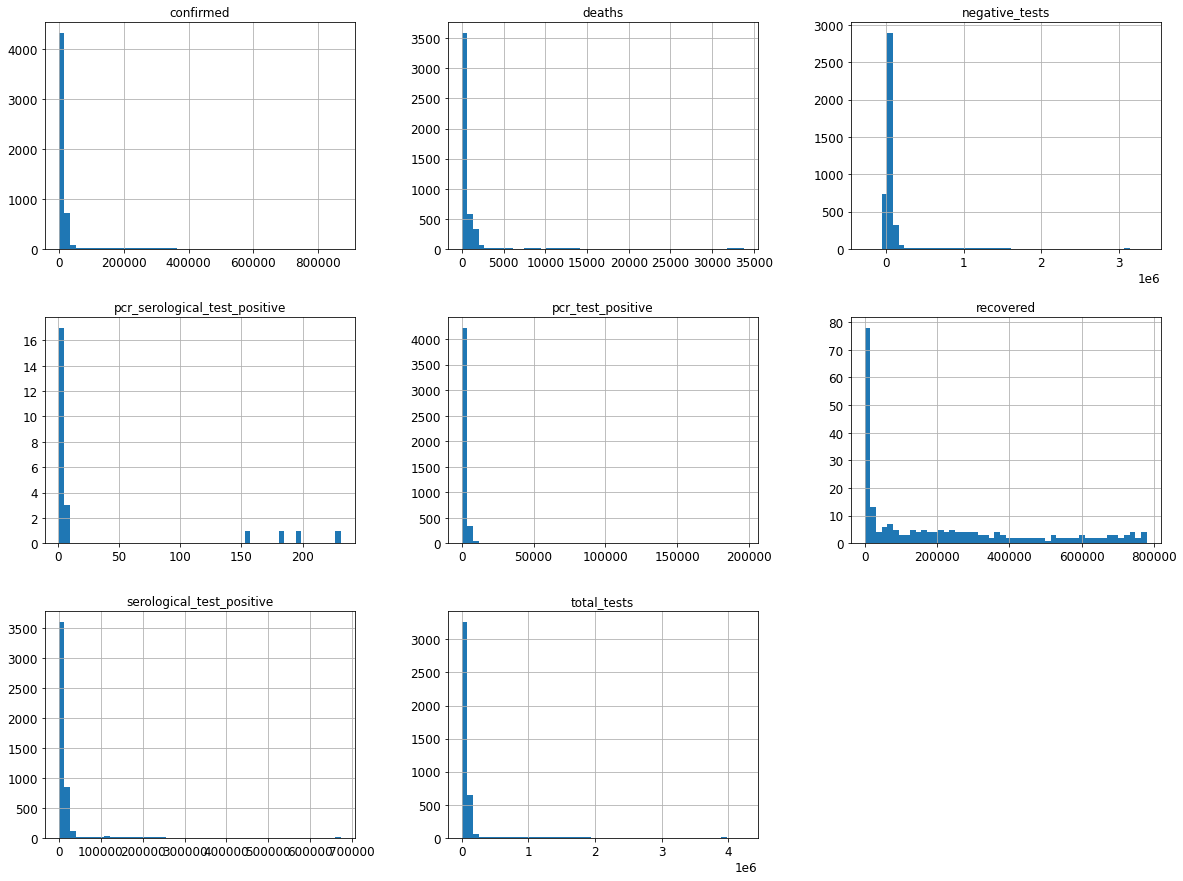

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
covid.hist(bins=50, figsize=(20,15))
plt.show()

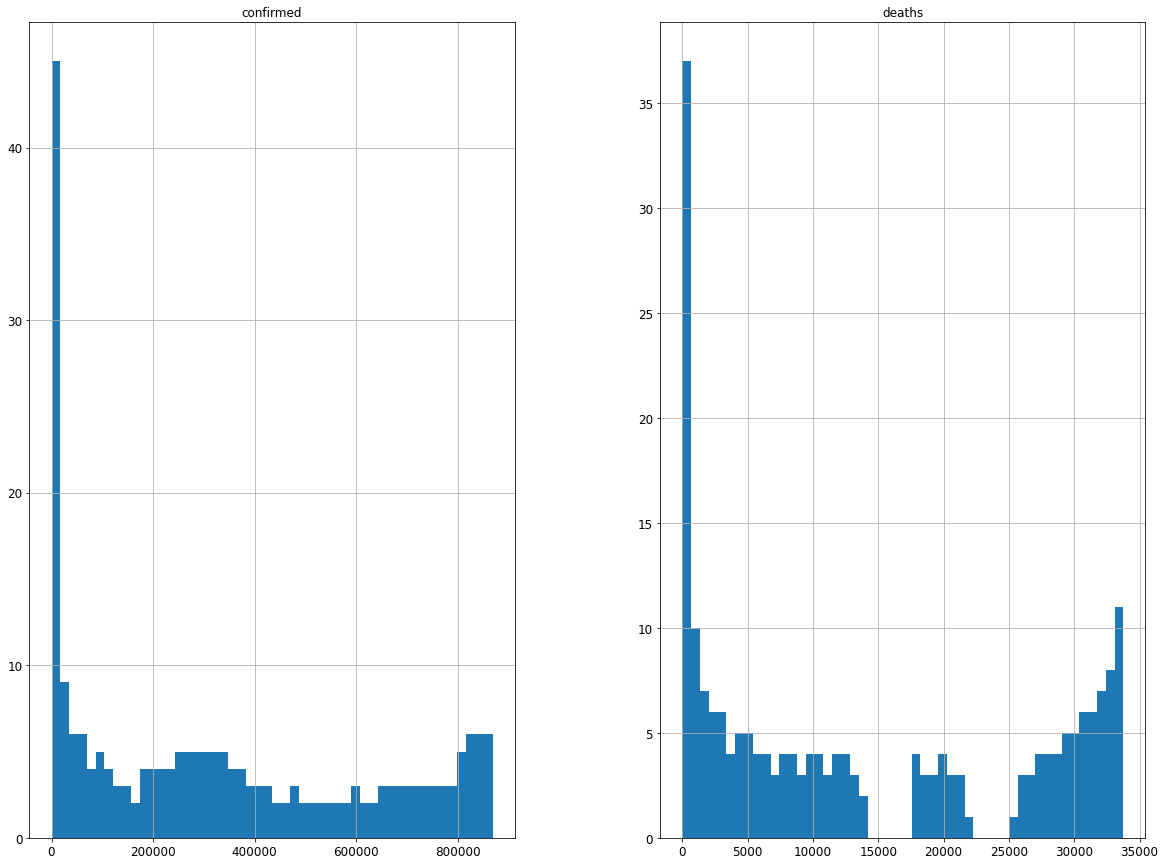

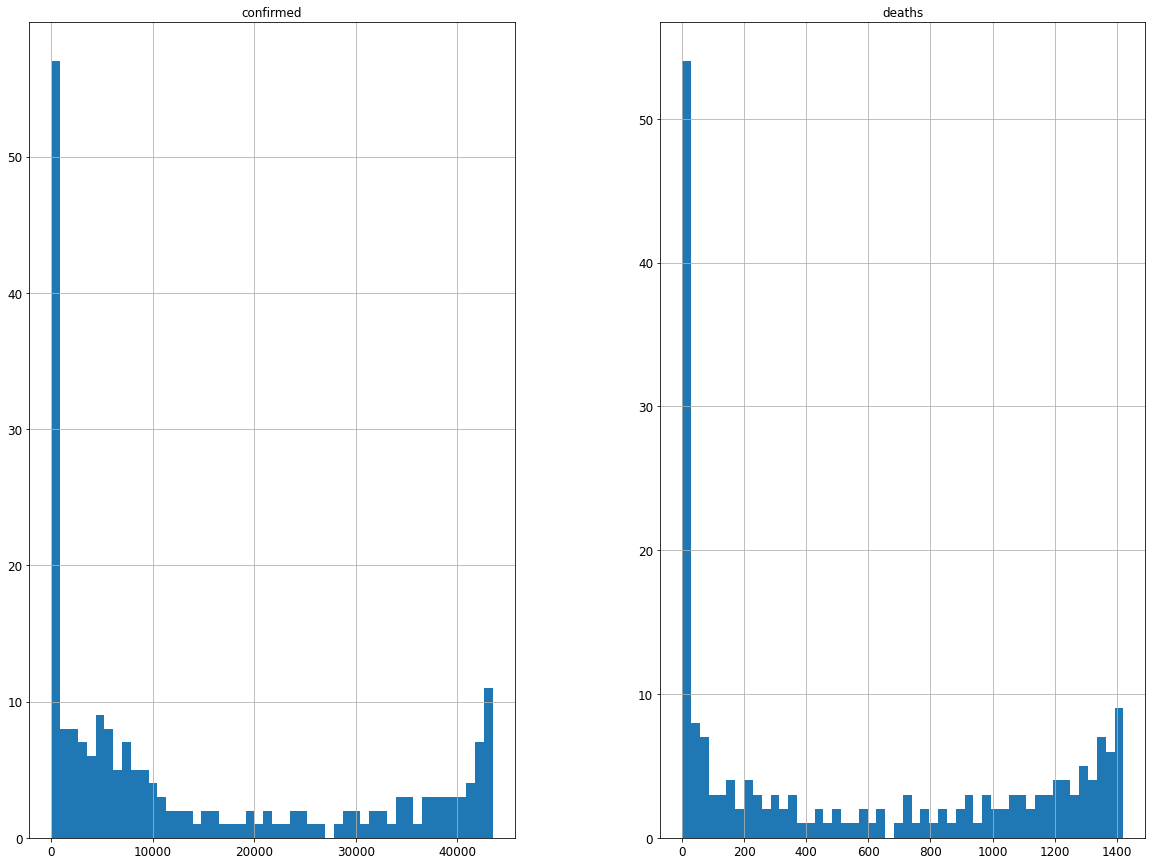

In [8]:
covid_peru = load_data_cols(["date","deaths","confirmed",'region'])


no_region = pd.isna(covid_peru['region'])
covid_peru_by_date = covid_peru[no_region]

#covid_peru_by_date = covid_peru_by_date.iloc[60:,:]

arequipa = covid_peru['region'] == "Arequipa"
covid_arequipa_by_date = covid_peru[arequipa]

#covid_arequipa_by_date.head()
#covid_peru_by_date.head()
#covid_peru_by_date = covid_peru_by_date[['date','region','total_tests','confirmed',"deaths"]]
covid_peru_by_date.hist(bins=50, figsize=(20,15))
plt.show()
covid_arequipa_by_date.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
def prediction(theta, X):
    return np.dot(X, theta)

def calculate_cost(X, y, theta):
    m = X.shape[0] 
    pred = prediction(theta, X)
    c = (1/(2*m)) * np.sum(np.square(pred - y))
    return c

def normalization(data):
    mean_ = data.mean(axis=0) 
    std_ = data.std(axis=0) #estandar
    return (data - mean_)/std_, mean_, std_

In [10]:
def gradient_descent(X, y, theta, nro_iter, learning_rate): 
    m = X.shape[0] 
    cost_history = np.zeros(nro_iter) 
    for i in range(nro_iter):
        pred = prediction(theta, X)
        pred = pred - y        
        theta = theta - (learning_rate * (np.dot(X.T,pred)/m))
        cost_history[i] = calculate_cost( X, y, theta) 
    return theta, cost_history


In [11]:
def getXandY(data,col):
    if col == 3:
        registers = ~pd.isna(data['deaths'])
        data = data[registers]

    if col == 2:
        registers = ~pd.isna(data['confirmed'])
        data = data[registers]


    X = data.values[:,col]
    y = data.values[:,col]

   
    X = np.reshape(X, (-1, 1))

    X = np.array(X, dtype=np.float64)
    y = np.array(y, dtype=np.float64)


    X, mean_, std_  = normalization(X)
    y, mean_, std_ = normalization(y)

    X = X[:-1,:]
    y = y[1:]

    #print(X)
    #print(y)

    X = np.concatenate((np.ones([X.shape[0], 1]), X), axis=1)

    return X, y, mean_, std_


In [12]:
def predictNextDays(y,theta,std_,mean_,num_days):
    last_y = y[-1]
    last_y = np.array([1,last_y])

    for i in range(num_days):
        y_predict = prediction(theta,last_y)
        print("day ",19+i,"th of october: ",(y_predict*std_)+mean_)
        last_y = np.array([1,y_predict])
    


Weights of gradient_descent - cases:  [0.01327281 1.00470413] 



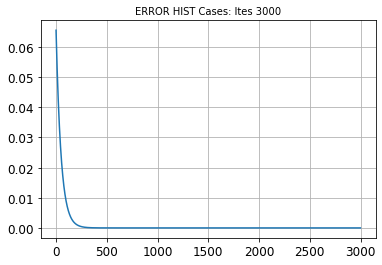

day  19 th of october:  875074.4367626042
day  20 th of october:  881503.9773210217
day  21 th of october:  887963.7632874842
day  22 th of october:  894453.9369403862
day  23 th of october:  900974.6412274186
day  24 th of october:  907526.0197687168
day  25 th of october:  914108.2168600247
day  26 th of october:  920721.3774758726
day  27 th of october:  927365.6472727696
day  28 th of october:  934041.1725924122
day  29 th of october:  940748.1004649082
Weights of gradient_descent - deaths:  [0.01274443 1.0024133 ] 



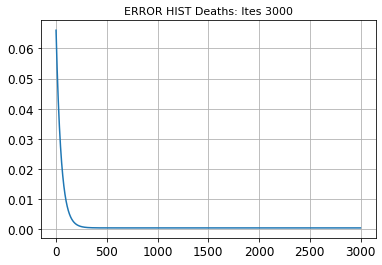

day  19 th of october:  33965.11196621546
day  20 th of october:  34171.72134268322
day  21 th of october:  34378.82932980404
day  22 th of october:  34586.43713087558
day  23 th of october:  34794.54595209946
day  24 th of october:  35003.1570025882
day  25 th of october:  35212.27149437228
day  26 th of october:  35421.890642407176
day  27 th of october:  35632.01566458041
day  28 th of october:  35842.64778171864
Weights of gradient_descent - cases:  [0.01321079 1.00644954] 



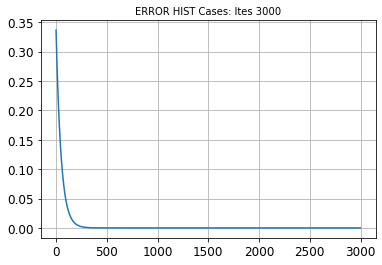

day  19 th of october:  43894.562176865606
day  20 th of october:  44291.66909829663
day  21 th of october:  44691.33717672509
day  22 th of october:  45093.58293043563
day  23 th of october:  45498.422984248245
day  24 th of october:  45905.87407020537
day  25 th of october:  46315.953028263415
day  26 th of october:  46728.67680698877
day  27 th of october:  47144.06246425826
day  28 th of october:  47562.12716796421
day  29 th of october:  47982.888196723914
Weights of gradient_descent - deaths:  [0.01383432 1.00378412] 



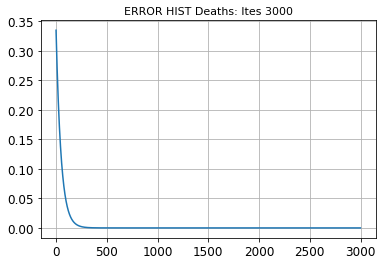

day  19 th of october:  1431.704075606255
day  20 th of october:  1442.4486567355466
day  21 th of october:  1453.2338966656976
day  22 th of october:  1464.0599492545512
day  23 th of october:  1474.9269689421687
day  24 th of october:  1485.835110753031
day  25 th of october:  1496.7845302982498
day  26 th of october:  1507.775383777789
day  27 th of october:  1518.8078279826918
day  28 th of october:  1529.8820202973177


In [13]:


dfs = [covid_peru_by_date, covid_arequipa_by_date]

for df in dfs:
    X_cases, y_cases, mean_cases, std_cases = getXandY(df,2)
    X_deaths, y_deaths, mean_deaths, std_deaths = getXandY(df,3)
    #print(X_cases)
    #print(y_cases)

    epochs = [3000]
    n_features = X_cases.shape[1]
    theta = np.random.rand(n_features)
    theta_deaths = theta_cases = np.zeros(n_features)
    learn_rate= 0.01

    for epoch in epochs:
        theta_cases, cost_history = gradient_descent(X_cases, y_cases, theta, epoch, learn_rate)
    
            
        fig, ax = plt.subplots()
        plt.plot(range(len(cost_history)), cost_history)
        plt.title('ERROR HIST Cases: Ites '+str(epoch), {'fontsize':10})
        print("Weights of gradient_descent - cases: ", theta_cases, "\n")

        ax.grid(True)
        plt.show()

        predictNextDays(y_cases,theta_cases,std_cases,mean_cases,11)

        theta_deaths, cost_history = gradient_descent(X_deaths, y_deaths, theta, epoch, learn_rate)
            
        fig, ax = plt.subplots()
        plt.plot(range(len(cost_history)), cost_history)
        plt.title('ERROR HIST Deaths: Ites '+str(epoch), {'fontsize':11})
        print("Weights of gradient_descent - deaths: ", theta_deaths, "\n")

        ax.grid(True)
        plt.show()

        predictNextDays(y_deaths,theta_deaths,std_deaths,mean_deaths,10)



In [14]:
def RMSE(X, theta,y):
    y_prediction = np.dot(X,theta)
    return np.sqrt(( 1 /  y_prediction.shape[0] ) * np.sum( (y_prediction - y) ** 2 ))


X_cases, y_cases, mean_cases, std_cases = getXandY(covid_peru_by_date,2)
Xtrain = X_cases[:int((70*X_cases.shape[0])/100),:]
ytrain = y_cases[:int((70*y_cases.shape[0])/100)]
Xtest = X_cases[int((70*X_cases.shape[0])/100):,:]
ytest = y_cases[int((70*X_cases.shape[0])/100):]



In [15]:
theta_cases, cost_history = gradient_descent(Xtrain, ytrain, theta, 3000, 0.01)

RMSE(Xtest,theta_cases,ytest)

0.01725941809174539